fatal: destination path 'Brain-Tumor-Detection' already exists and is not an empty directory.

Checking paths:
Glioma path exists: True
Meningioma path exists: True
Pituitary path exists: True
No tumor path exists: True

Number of images in each class:
Glioma: 1321
Meningioma: 1339
Pituitary: 1457
No tumor: 1595

Loading images...

Loaded 1321 glioma images
Loaded 1339 meningioma images
Loaded 1457 pituitary images
Loaded 1595 no tumor images

Total images: 5712
Image shape: (150, 150, 3)


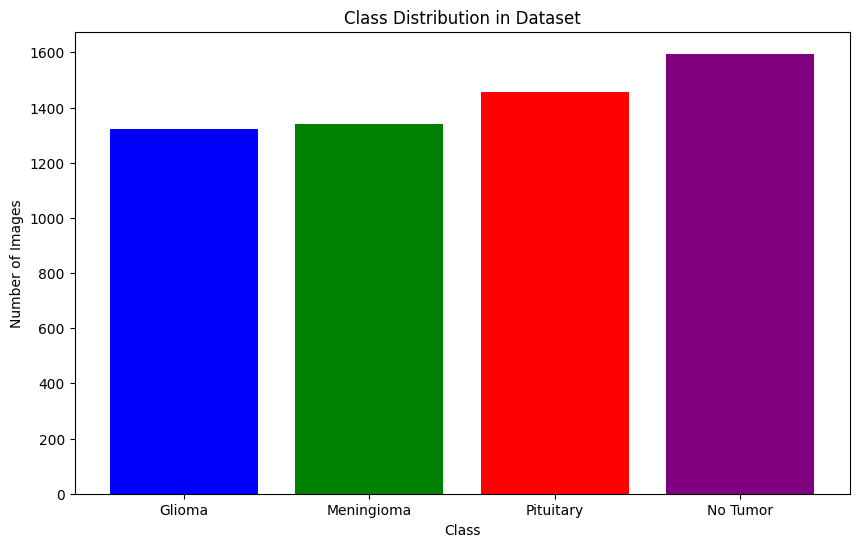


Training set shape: (4569, 150, 150, 3)
Validation set shape: (1143, 150, 150, 3)

Visualizing original vs augmented images...


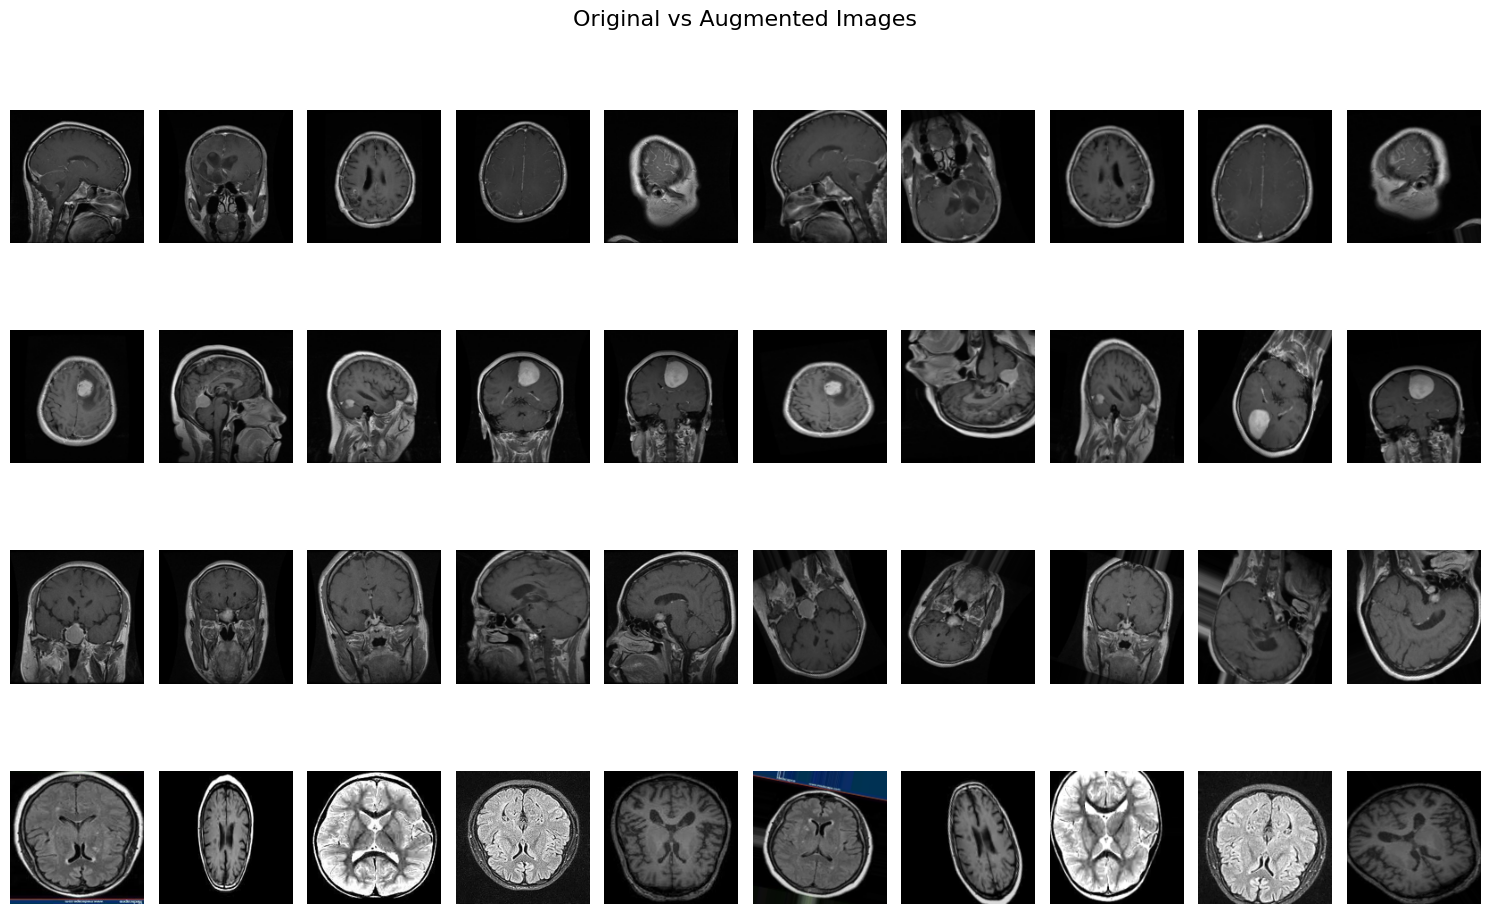


Balancing dataset with augmentation...


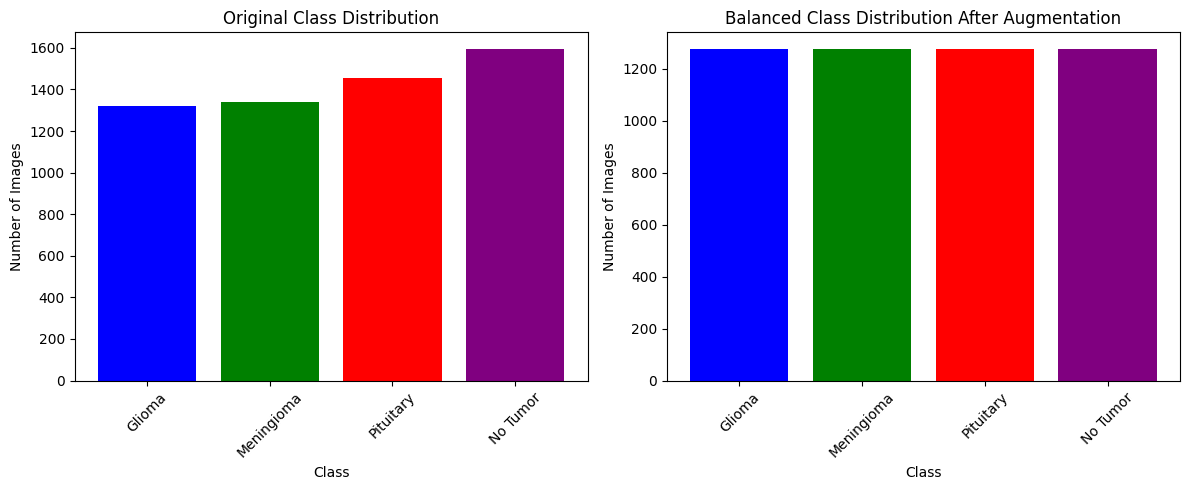


Dataset Preparation Complete!
Training samples: 5104
Validation samples: 1143
Batch size: 32
Number of classes: 4

Augmented data saved successfully to /content/processed_data!

Sample of augmented images for each class:


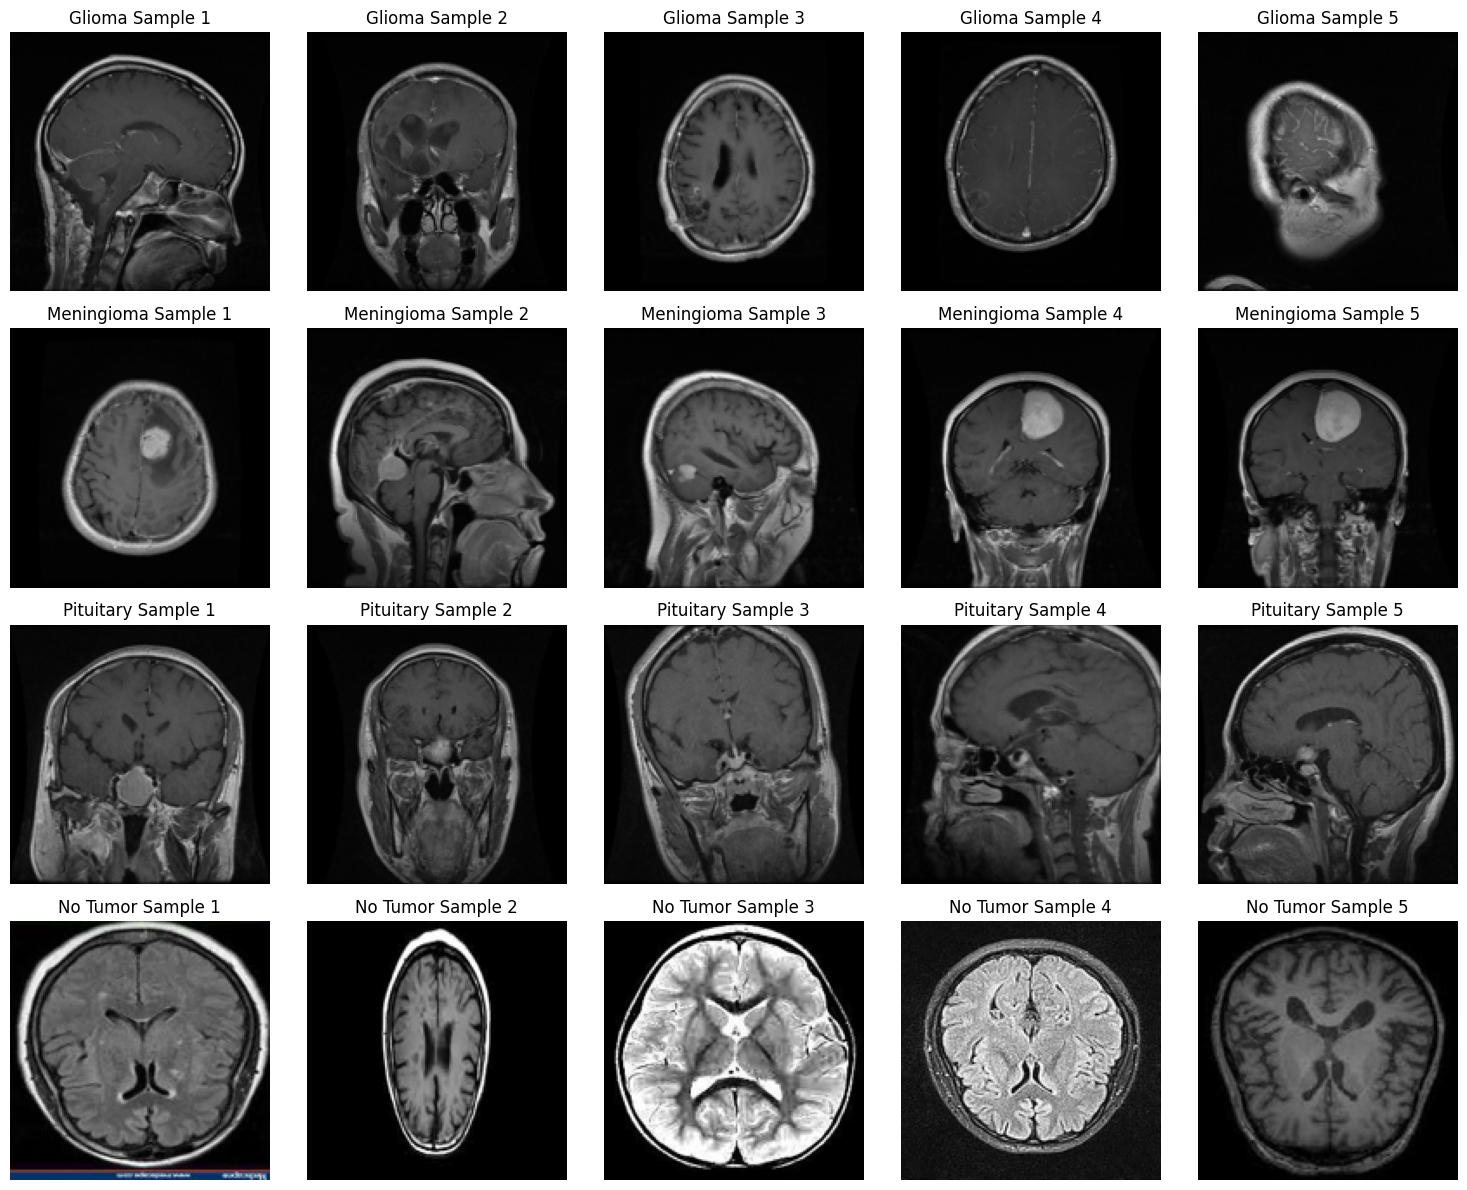


=== DATA AUGMENTATION SUMMARY ===
Original dataset size: 5712 images
After augmentation: 5104 images
Augmentation increased dataset by -608 images
Validation set size: 1143 images

Class distribution after augmentation:
Glioma: 1276 images
Meningioma: 1276 images
Pituitary: 1276 images
No Tumor: 1276 images


In [4]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2

# Set random seed for reproducibility
np.random.seed(42)

# Clone the GitHub repository
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git

# Set dataset path
dataset_path = '/content/Brain-Tumor-Detection'

# Define correct paths based on the actual repository structure
training_path = os.path.join(dataset_path, 'data', 'Training')
testing_path = os.path.join(dataset_path, 'data', 'Testing')

glioma_path = os.path.join(training_path, 'glioma')
meningioma_path = os.path.join(training_path, 'meningioma')
pituitary_path = os.path.join(training_path, 'pituitary')
no_tumor_path = os.path.join(training_path, 'notumor')

# Check if paths exist
print("\nChecking paths:")
print("Glioma path exists:", os.path.exists(glioma_path))
print("Meningioma path exists:", os.path.exists(meningioma_path))
print("Pituitary path exists:", os.path.exists(pituitary_path))
print("No tumor path exists:", os.path.exists(no_tumor_path))

# Count files in each directory
def count_files(directory):
    if os.path.exists(directory):
        return len([f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')])
    return 0

print("\nNumber of images in each class:")
print("Glioma:", count_files(glioma_path))
print("Meningioma:", count_files(meningioma_path))
print("Pituitary:", count_files(pituitary_path))
print("No tumor:", count_files(no_tumor_path))

# Load and explore the dataset
def load_images(folder_path, label, img_size=(150, 150)):
    images = []
    labels = []
    if not os.path.exists(folder_path):
        print(f"Warning: Directory {folder_path} does not exist!")
        return np.array(images), np.array(labels)

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(img_size)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load images from each class
img_size = (150, 150)  # Standard size for all images

print("\nLoading images...")
glioma_images, glioma_labels = load_images(glioma_path, 0, img_size)
meningioma_images, meningioma_labels = load_images(meningioma_path, 1, img_size)
pituitary_images, pituitary_labels = load_images(pituitary_path, 2, img_size)
no_tumor_images, no_tumor_labels = load_images(no_tumor_path, 3, img_size)

# Check if we have images from all classes
print(f"\nLoaded {len(glioma_images)} glioma images")
print(f"Loaded {len(meningioma_images)} meningioma images")
print(f"Loaded {len(pituitary_images)} pituitary images")
print(f"Loaded {len(no_tumor_images)} no tumor images")

# Combine all data
X = np.concatenate((glioma_images, meningioma_images, pituitary_images, no_tumor_images), axis=0)
y = np.concatenate((glioma_labels, meningioma_labels, pituitary_labels, no_tumor_labels), axis=0)

# Check the shape of the dataset
print(f"\nTotal images: {X.shape[0]}")
print(f"Image shape: {X.shape[1:]}")

# Display class distribution
class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
class_counts = [len(glioma_labels), len(meningioma_labels), len(pituitary_labels), len(no_tumor_labels)]

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=['blue', 'green', 'red', 'purple'])
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=4)
y_val_categorical = to_categorical(y_val, num_classes=4)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

# Data Augmentation Implementation
def create_augmentation_generator():
    """
    Create an ImageDataGenerator with various augmentation techniques
    """
    return ImageDataGenerator(
        rotation_range=30,        # Random rotation between -30 and 30 degrees
        width_shift_range=0.1,    # Random horizontal shift
        height_shift_range=0.1,   # Random vertical shift
        shear_range=0.2,          # Shear transformation
        zoom_range=0.2,           # Random zoom
        horizontal_flip=True,     # Random horizontal flip
        vertical_flip=True,       # Random vertical flip
        brightness_range=[0.8, 1.2],  # Random brightness adjustment
        fill_mode='nearest'       # Fill points outside boundaries
    )

# Create the augmentation generator
augmentation_generator = create_augmentation_generator()

# Visualize some original and augmented images
def visualize_augmentation(images, labels, augmentation_generator, num_samples=5):
    """
    Visualize original and augmented images for each class
    """
    fig, axes = plt.subplots(4, num_samples*2, figsize=(15, 10))
    fig.suptitle('Original vs Augmented Images', fontsize=16)

    for class_idx in range(4):
        # Get samples for this class
        class_images = images[labels == class_idx]
        if len(class_images) > 0:
            sample_images = class_images[:num_samples]

            for i in range(num_samples):
                # Original image
                axes[class_idx, i].imshow(sample_images[i].astype('uint8'))
                axes[class_idx, i].axis('off')
                if i == 0:
                    axes[class_idx, i].set_ylabel(class_names[class_idx], rotation=90, size='large')

                # Augmented image
                augmented = augmentation_generator.random_transform(sample_images[i].astype('float32'))
                axes[class_idx, i+num_samples].imshow(augmented.astype('uint8'))
                axes[class_idx, i+num_samples].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize augmentation for each class
print("\nVisualizing original vs augmented images...")
visualize_augmentation(X_train, y_train, augmentation_generator)

# Create a function to generate augmented data
def generate_augmented_data(X, y, augmentation_generator, augment_times=2):
    """
    Generate augmented data for minority classes to balance the dataset
    """
    # Count samples per class
    unique, counts = np.unique(y, return_counts=True)
    max_count = max(counts)

    X_augmented = [X]
    y_augmented = [y]

    for class_idx in range(len(unique)):
        class_count = counts[class_idx]
        if class_count < max_count:
            # Calculate how many augmentations we need
            needed = max_count - class_count
            class_images = X[y == class_idx]

            # Generate augmented images
            augmented_count = 0
            while augmented_count < needed:
                for img in class_images:
                    if augmented_count >= needed:
                        break
                    # Apply augmentation
                    augmented_img = augmentation_generator.random_transform(img.astype('float32'))
                    X_augmented.append(augmented_img[np.newaxis, ...])
                    y_augmented.append(np.array([class_idx]))
                    augmented_count += 1

    # Combine all data
    X_combined = np.concatenate(X_augmented, axis=0)
    y_combined = np.concatenate(y_augmented, axis=0)

    return X_combined, y_combined

# Apply augmentation to balance the dataset
print("\nBalancing dataset with augmentation...")
X_balanced, y_balanced = generate_augmented_data(X_train, y_train, augmentation_generator)

# Check the new class distribution
balanced_counts = [np.sum(y_balanced == i) for i in range(4)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(class_names, class_counts, color=['blue', 'green', 'red', 'purple'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(class_names, balanced_counts, color=['blue', 'green', 'red', 'purple'])
plt.title('Balanced Class Distribution After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create data generators for training with augmentation
batch_size = 32

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation generator (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow(
    X_balanced,
    to_categorical(y_balanced, num_classes=4),
    batch_size=batch_size,
    shuffle=True
)

val_generator = val_datagen.flow(
    X_val,
    y_val_categorical,
    batch_size=batch_size,
    shuffle=False
)

# Print final dataset information
print("\nDataset Preparation Complete!")
print(f"Training samples: {X_balanced.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Batch size: {batch_size}")
print(f"Number of classes: {4}")

# Create directory to save processed data
output_dir = '/content/processed_data'
os.makedirs(output_dir, exist_ok=True)

# Save the preprocessed data for use in model training
np.save(os.path.join(output_dir, 'X_train_augmented.npy'), X_balanced)
np.save(os.path.join(output_dir, 'y_train_augmented.npy'), y_balanced)
np.save(os.path.join(output_dir, 'X_val.npy'), X_val)
np.save(os.path.join(output_dir, 'y_val.npy'), y_val)

print(f"\nAugmented data saved successfully to {output_dir}!")

# Display sample of augmented images
print("\nSample of augmented images for each class:")
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
for class_idx in range(4):
    class_images = X_balanced[y_balanced == class_idx]
    for i in range(5):
        if i < len(class_images):
            axes[class_idx, i].imshow(class_images[i].astype('uint8'))
            axes[class_idx, i].set_title(f'{class_names[class_idx]} Sample {i+1}')
            axes[class_idx, i].axis('off')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== DATA AUGMENTATION SUMMARY ===")
print(f"Original dataset size: {X.shape[0]} images")
print(f"After augmentation: {X_balanced.shape[0]} images")
print(f"Augmentation increased dataset by {X_balanced.shape[0] - X.shape[0]} images")
print(f"Validation set size: {X_val.shape[0]} images")
print("\nClass distribution after augmentation:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {balanced_counts[i]} images")